<div class="alert alert-block alert-success">
    <h1 align="center">Pandas with Hussein</h1>
    <h3 align="center">Best Project which Brings you up</h3>
</div>

<img src = "https://www.cyclonis.com/images/2020/03/googleplay.jpg" width=50%>

## Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Load and Prepare Data

In [2]:
# Load Data
Data=pd.read_csv("googleplaystore.csv")

## EDA

In [3]:
Data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# Data Preprocessing

##### Overview of the Data

In [4]:
print("we have " + str(Data.shape[0]) + " Data")
print("we have "+ str(Data.shape[1]) + " Parameters")
print("Number of Categories: " + str(len(Data["Category"].unique())))
print("Number of Genres: " + str(len(Data["Genres"].unique())))
print("Number of Types: " + str(len(Data["Type"].unique())))
print("Number of Content Ratings: " + str(len(Data["Content Rating"].unique())))
print('\n')
print("content ratings:", end="\t")
for i in list(Data["Content Rating"].unique()): print(str(i), end='\t')
print('\n')
print("Types:", end="\t")
for i in list(Data["Type"].unique()): print(str(i), end='\t')
print('\n')
print("Columns:", end='    ')
for i in list(Data.columns): print(str(i), end=' -- ')

we have 10841 Data
we have 13 Parameters
Number of Categories: 34
Number of Genres: 120
Number of Types: 3
Number of Content Ratings: 6


content ratings:	Everyone	Teen	Everyone 10+	Mature 17+	Adults only 18+	Unrated	

Types:	Free	Paid	nan	

Columns:    App -- Category -- Rating -- Reviews -- Size -- Installs -- Type -- Price -- Content Rating -- Genres -- Last Updated -- Current Ver -- Android Ver -- 

#### Data Had a problem - Removing missing values

In [5]:
Data[Data["Installs"]=='Free']

#The data on row 10472 is one column displaced
#Since it contains nan value we can solve this problem using dropna method

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [6]:
#Here we drop all nan values

Data = Data.dropna()

In [7]:
Data[Data["Installs"]=='Free']

#Now it is removed since it contains nan value

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Reform Installs and Reviews columns to numeric values

In [8]:
# In order to be able to do mathematical operations with string type of Installs columns we make it into floats

n=[]
for i in list(Data['Installs']): i = i.replace('+', ''); i = i.replace(',', ''); n.append(float(i))
Data["Installs"] = n

# Review column is in string, we change it into integer type

Data['Reviews'] = pd.to_numeric(Data['Reviews'])

In [9]:
# Now it looks like this:

Data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


#### Size and Price columns in Object form thats we have to change it into float to be able to make use of it

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   float64
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1023.8+ KB


## Strorytelling - Visualization

##### More than 90 percent of the app are for free in GooglePlay

<AxesSubplot:xlabel='Type', ylabel='Percent'>

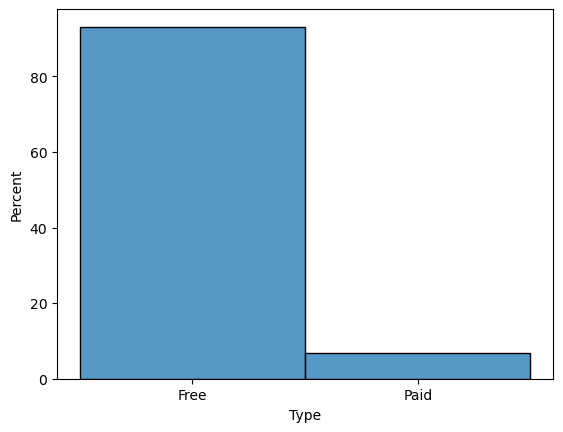

In [11]:
sns.histplot(data=Data, x='Type', stat='percent')

# This means that most of the app are for free in GooglePlay

#### there are few +18 Apps / Most of the Apps do not follow age restrictions

<AxesSubplot:xlabel='Content Rating', ylabel='count'>

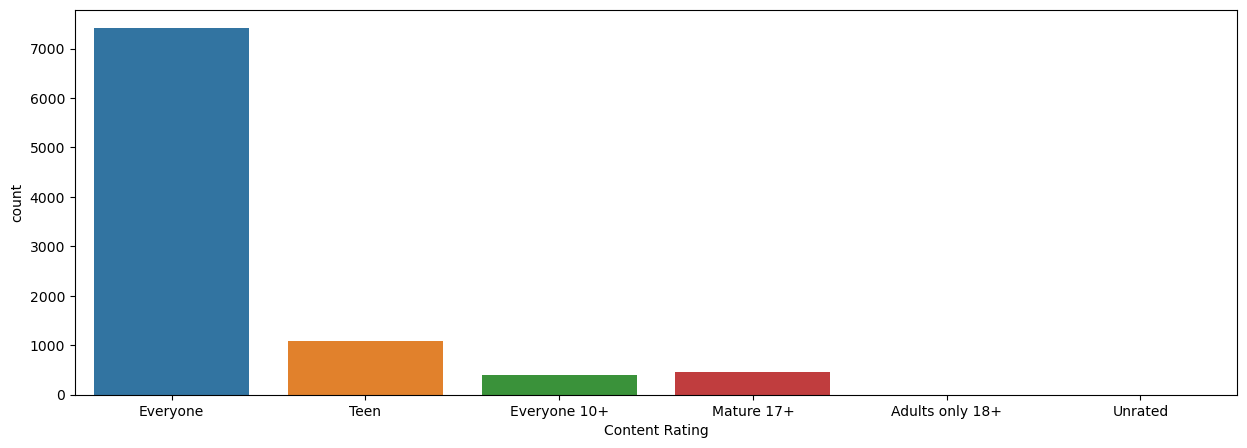

In [12]:
plt.figure(figsize=(15, 5))
sns.countplot(data=Data, x='Content Rating')

# This plot says that there are few +18 Apps
# most of the apps are for everyone and do not follow age restrictions

#### Most of the Apps produced are for Family BUT it doesn't the same portion of installs
#### As in the Games category, having high reviews leads to high installs
#### Most of the Apps and consequently categories have the same average ratings which is around 4

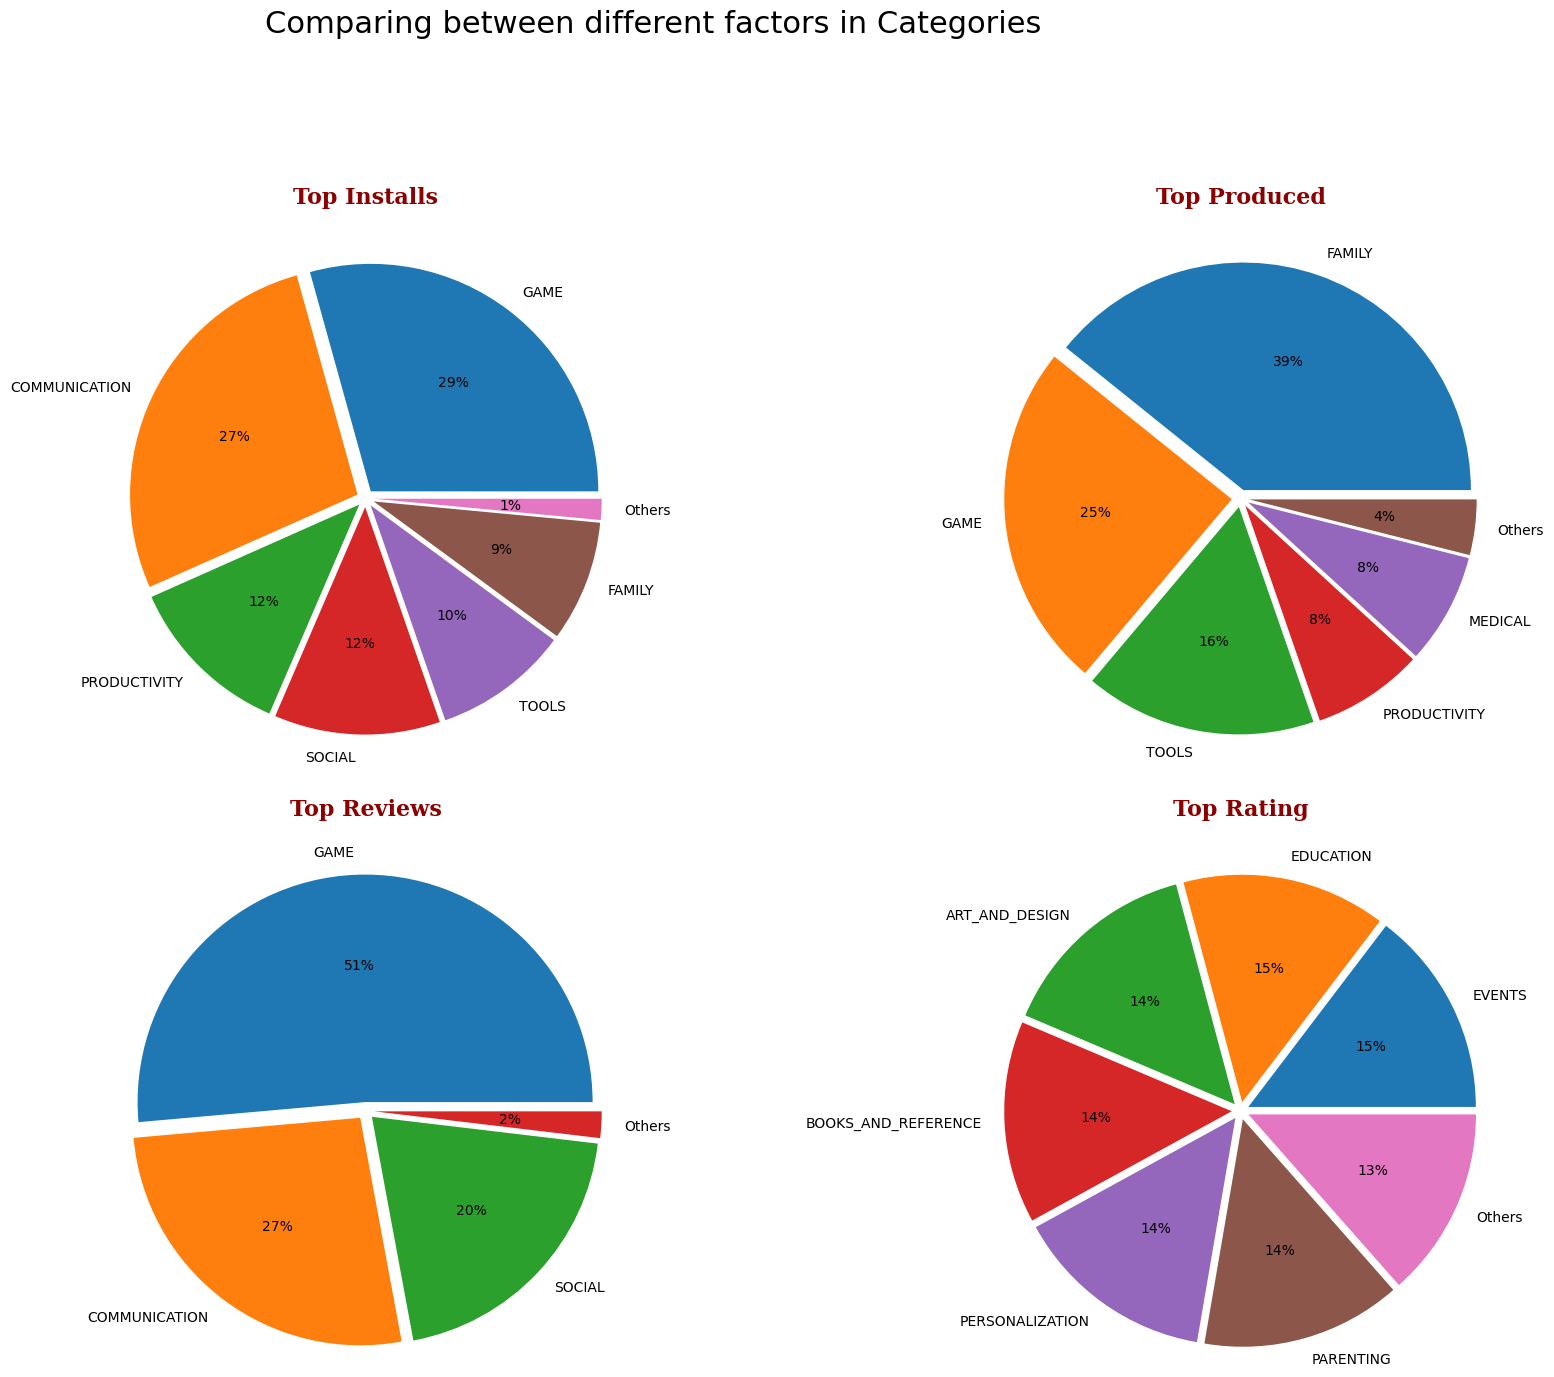

In [13]:
# First Pie Plot
    # sort top ten categories with highest app put on GooglePlay 
df = Data.groupby(by=['Category']).count().reset_index()[['Category', 'App']].sort_values(by='App', ascending=False, ignore_index=True)
df1 = df.loc[df['App'] >= 350]

    # Adding one row as for the mean of other categories

df2 = pd.concat([df1, pd.DataFrame(columns=['Category', 'App'], data={'Category': 'Others', 'App': df.loc[df['App'] < 350]["App"].mean()}, index=[df1.shape[0]+1])])

# Second Pie plot
    
    # sort top ten categories with highest installs 
df3 = Data.groupby(by=['Category']).sum().reset_index()[['Category', 'Installs']].sort_values(by='Installs', ascending=False, ignore_index=True)

df4 = df3.loc[df3['Installs'] >= 1.025765e+10]

    # Adding one row as for the mean of other categories

df5 = pd.concat([df4, pd.DataFrame(columns=['Category', 'Installs'], data={'Category': 'Others', 'Installs': df3.loc[df3['Installs'] < 1.025765e+10]["Installs"].mean()}, index=[df4.shape[0]+1])])

# Third Pie plot

    # sort top ten categories with highest Reviews 
df6 = Data.groupby(by=['Category']).Reviews.sum().reset_index().sort_values(by='Reviews', ascending=False, ignore_index=True)

df7 = df6.loc[df6['Reviews'] >= 621241091]

    # Adding one row as for the mean of other categories

df8 = pd.concat([df7, pd.DataFrame(columns=['Category', 'Reviews'], data={'Category': 'Others', 'Reviews': df6.loc[df6['Reviews'] < 621241091]["Reviews"].mean()}, index=[df7.shape[0]+1])])

# Forth Pie plot

    # sort top ten categories with highest Reviews 
df9 = Data.groupby(by=['Category']).Rating.mean().reset_index().sort_values(by='Rating', ascending=False, ignore_index=True)

df10 = df9.loc[df9['Rating'] >= 4.300000]

    # Adding one row as for the mean of other categories

df11 = pd.concat([df10, pd.DataFrame(columns=['Category', 'Rating'], data={'Category': 'Others', 'Rating': df9.loc[df9['Rating'] < 4.300000]["Rating"].mean()}, index=[df10.shape[0]+1])])


# Drawing the pie chart using pyplot

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, figsize=(15,15))
fig.suptitle('Comparing between different factors in Categories', fontsize=22)
ax1.pie(x=list(df5["Installs"]), labels=list(df5["Category"]), explode= (np.ones((1,df4.shape[0]+1))*0.05).tolist()[0], colors=sns.color_palette(as_cmap=True), radius=1.3, autopct='%.0f%%')
ax2.pie(x=list(df2["App"]), labels=list(df2["Category"]), explode= (np.ones((1,df1.shape[0]+1))*0.05).tolist()[0], colors=sns.color_palette(as_cmap=True), radius=1.3, autopct='%.0f%%')
ax3.pie(x=list(df8["Reviews"]), labels=list(df8["Category"]), explode= (np.ones((1,df7.shape[0]+1))*0.05).tolist()[0], colors=sns.color_palette(as_cmap=True), radius=1.3, autopct='%.0f%%')
ax4.pie(x=list(df11["Rating"]), labels=list(df11["Category"]), explode= (np.ones((1,df10.shape[0]+1))*0.05).tolist()[0], colors=sns.color_palette(as_cmap=True), radius=1.3, autopct='%.0f%%')
ax1.set_title('Top Installs', pad=55, fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 16})
ax2.set_title('Top Produced', pad=55, fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 16})
ax3.set_title('Top Reviews', pad=55, fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 16})
ax4.set_title('Top Rating', pad=55, fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 16})
fig.tight_layout(pad=1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.1, top=0.8, wspace=0.4, hspace=0.4)
plt.show()

# Top ten Categories with the highest number of apps produced are like the chart bellow

#### Most of the developers are considering more on Tools while the users desires are most likely on Communication
#### As Installs and reviews coincidence says Communication is the most interesting Genre for the users
#### Rating is likely not correlated

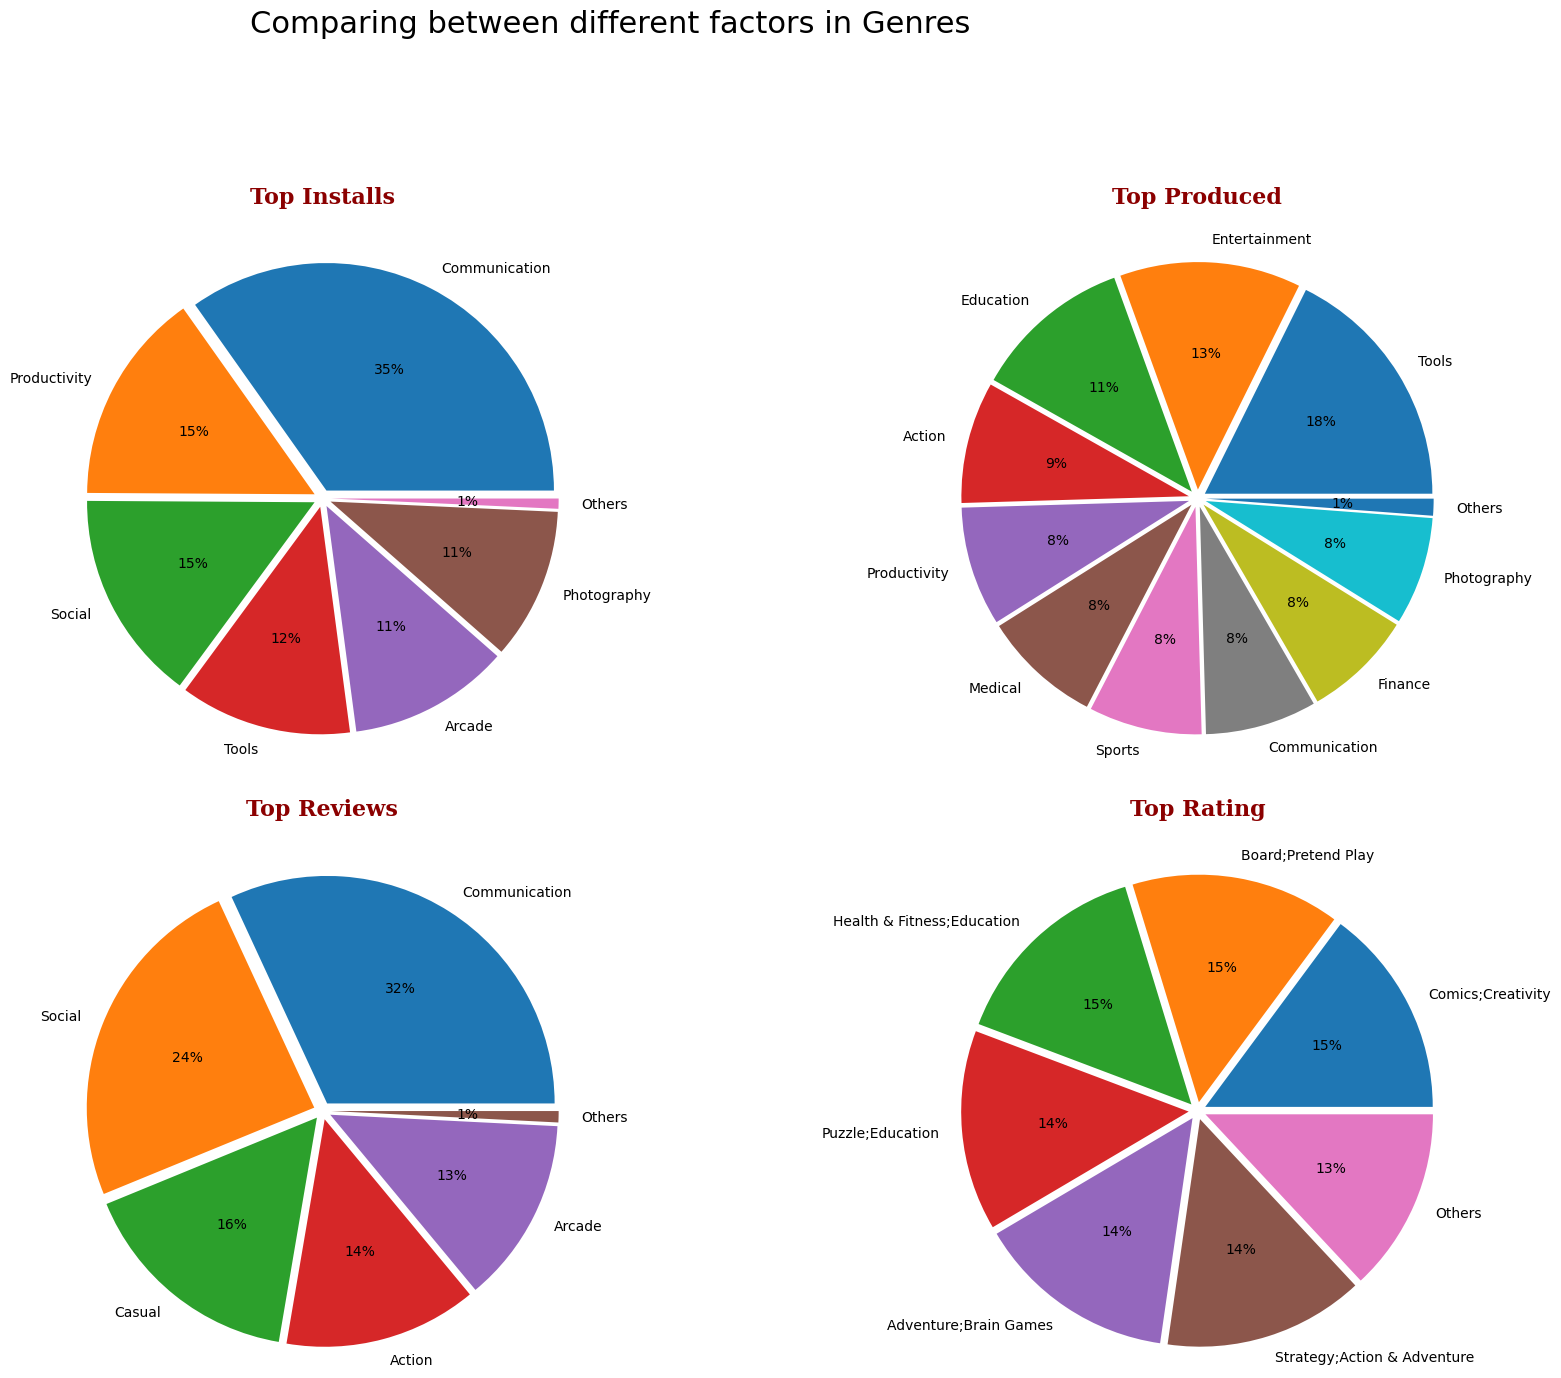

In [14]:
# First Pie Plot
    # sort top ten categories with highest app put on GooglePlay 
df = Data.groupby(by=['Genres']).count().reset_index()[['Genres', 'App']].sort_values(by='App', ascending=False, ignore_index=True)
df1 = df.loc[df['App'] >= 317]

    # Adding one row as for the mean of other categories

df2 = pd.concat([df1, pd.DataFrame(columns=['Genres', 'App'], data={'Genres': 'Others', 'App': df.loc[df['App'] < 317]["App"].mean()}, index=[df1.shape[0]+1])])

# Second Pie plot
    
    # sort top ten categories with highest installs 
df3 = Data.groupby(by=['Genres']).sum().reset_index()[['Genres', 'Installs']].sort_values(by='Installs', ascending=False, ignore_index=True)

df4 = df3.loc[df3['Installs'] >= 9.662779e+09]

    # Adding one row as for the mean of other categories

df5 = pd.concat([df4, pd.DataFrame(columns=['Genres', 'Installs'], data={'Genres': 'Others', 'Installs': df3.loc[df3['Installs'] < 9.662779e+09]["Installs"].mean()}, index=[df4.shape[0]+1])])

# Third Pie plot

    # sort top ten categories with highest Reviews 
df6 = Data.groupby(by=['Genres']).Reviews.sum().reset_index().sort_values(by='Reviews', ascending=False, ignore_index=True)

df7 = df6.loc[df6['Reviews'] >= 336990398]

    # Adding one row as for the mean of other categories

df8 = pd.concat([df7, pd.DataFrame(columns=['Genres', 'Reviews'], data={'Genres': 'Others', 'Reviews': df6.loc[df6['Reviews'] < 336990398]["Reviews"].mean()}, index=[df7.shape[0]+1])])

# Forth Pie plot

    # sort top ten categories with highest Reviews 
df9 = Data.groupby(by=['Genres']).Rating.mean().reset_index().sort_values(by='Rating', ascending=False, ignore_index=True)

df10 = df9.loc[df9['Rating'] >= 4.600000]

    # Adding one row as for the mean of other categories

df11 = pd.concat([df10, pd.DataFrame(columns=['Genres', 'Rating'], data={'Genres': 'Others', 'Rating': df9.loc[df9['Rating'] < 4.600000]["Rating"].mean()}, index=[df10.shape[0]+1])])


# Drawing the pie chart using pyplot

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, figsize=(15,15))
fig.suptitle('Comparing between different factors in Genres', fontsize=22)
ax1.pie(x=list(df5["Installs"]), labels=list(df5["Genres"]), explode= (np.ones((1,df4.shape[0]+1))*0.05).tolist()[0], colors=sns.color_palette(as_cmap=True), radius=1.3, autopct='%.0f%%')
ax2.pie(x=list(df2["App"]), labels=list(df2["Genres"]), explode= (np.ones((1,df1.shape[0]+1))*0.05).tolist()[0], colors=sns.color_palette(as_cmap=True), radius=1.3, autopct='%.0f%%')
ax3.pie(x=list(df8["Reviews"]), labels=list(df8["Genres"]), explode= (np.ones((1,df7.shape[0]+1))*0.05).tolist()[0], colors=sns.color_palette(as_cmap=True), radius=1.3, autopct='%.0f%%')
ax4.pie(x=list(df11["Rating"]), labels=list(df11["Genres"]), explode= (np.ones((1,df10.shape[0]+1))*0.05).tolist()[0], colors=sns.color_palette(as_cmap=True), radius=1.3, autopct='%.0f%%')
ax1.set_title('Top Installs', pad=55, fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 16})
ax2.set_title('Top Produced', pad=55, fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 16})
ax3.set_title('Top Reviews', pad=55, fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 16})
ax4.set_title('Top Rating', pad=55, fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 16})
fig.tight_layout(pad=1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.1, top=0.8, wspace=0.4, hspace=0.4)
plt.show()

# Top ten Categories with the highest number of apps produced are like the chart bellow

#### Reforming Size and Making analysis between the Size of the App and amount of Installs
#### Does Installs fall when the Size of the app rise???
#### No, It has an optimum and peak point
#### If you are an App developer your App Size shall not be above 10 GB

              Size      Installs
0    0 MB - 100 MB  9.231532e+05
1    100 MB - 1 GB  4.463958e+05
2     1 GB - 10 GB  7.687894e+06
3  100 GB and More  1.733939e+06


<AxesSubplot:xlabel='Size', ylabel='Installs'>

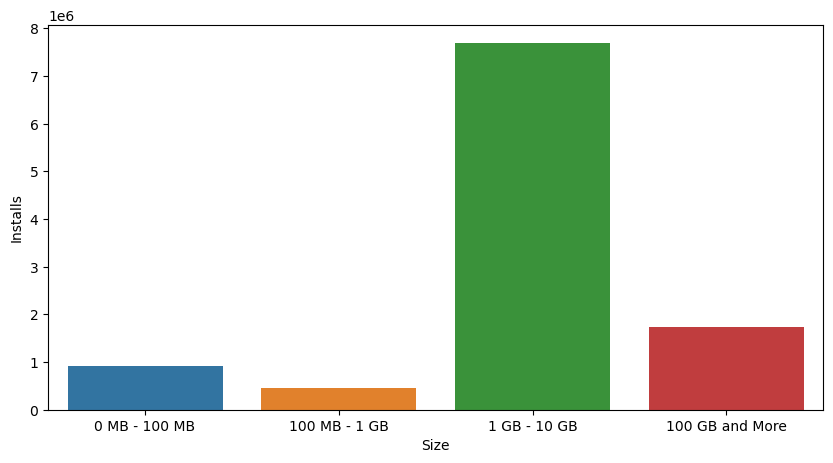

In [15]:
# Reforming Size

Data1 = Data.copy()
Data1['Size'] = Data1['Size'].str.replace('M', '000000')
Data1['Size'] = Data1['Size'].str.replace('k', '000')
Data1 = Data1[Data1['Size']!='Varies with device']
Data1['Size'] = Data1['Size'].astype('float')

# Sorting

Data1 = Data1.sort_values(by='Size', ascending=True)

# Categorizing Size into four classes

Data1 = Data1.replace(Data1.loc[(Data1['Size'] <= 100000)]['Size'].tolist(), 100)
Data1 = Data1.replace(Data1.loc[(Data1['Size'] > 100000) & (Data1['Size'] < 1000000)]['Size'].tolist(), 1000)
Data1 = Data1.replace(Data1.loc[(Data1['Size'] > 100000) & (Data1['Size'] < 1000000)]['Size'].tolist(), 1000)
Data1 = Data1.replace(Data1.loc[(Data1['Size'] > 1000000) & (Data1['Size'] < 10000000)]['Size'].tolist(), 10000)
Data1 = Data1.replace(Data1.loc[(Data1['Size'] > 10000000)]['Size'].tolist(), 100000)
Data1 = Data1.replace(Data1.loc[(Data1['Size'] > 10000000)]['Size'].tolist(), 100000)

# Using Groupby to make categories

data = Data1.groupby(by='Size').Installs.mean().tolist()

# New DataFrame which is shown bellow

Data2 = pd.DataFrame(data = {'Size': ["0 MB - 100 MB", "100 MB - 1 GB", "1 GB - 10 GB", "100 GB and More"], 'Installs': data})
print(Data2)

# Plotting figure

plt.figure(figsize=(10, 5))
sns.barplot(x=Data2['Size'], y=Data2['Installs'])

#### Reforming Price and Making analysis between the Price of the App and amount of Installs
#### Does Installs fall when the Price go up???
#### Yes, Prices above 1 dolar have been very rarely downloaded.
#### If you are an App developer your App Price shall not be above 1 Dolar.

           Price      Installs
0      0 $ - 1 $  1.898145e+07
1     1 $ - 10 $  1.100200e+05
2   10 $ - 200 $  1.704782e+04
3  200 $ - 300 $  1.000000e+04
4  300 $ - 400 $  1.493571e+04


<AxesSubplot:xlabel='Price', ylabel='Installs'>

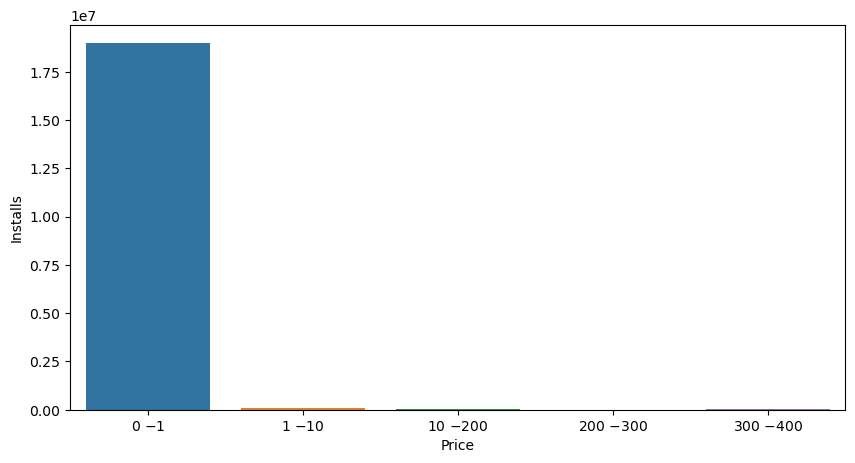

In [16]:
# Reforming Price

Data1 = Data.copy()
Data1['Price'] = Data1['Price'].str.replace("$", '', regex=True).astype('float')

# Sorting

Data1 = Data1.sort_values(by='Price', ascending=True)

# Categorizing Size into four classes

Data1 = Data1.replace(Data1.loc[(Data1['Price'] <= 1)]['Price'].tolist(), 1)
Data1 = Data1.replace(Data1.loc[(Data1['Price'] > 1) & (Data1['Price'] <= 10)]['Price'].tolist(), 10)
Data1 = Data1.replace(Data1.loc[(Data1['Price'] > 10) & (Data1['Price'] <= 200)]['Price'].tolist(), 200)
Data1 = Data1.replace(Data1.loc[(Data1['Price'] > 200) & (Data1['Price'] <= 300)]['Price'].tolist(), 300)
Data1 = Data1.replace(Data1.loc[(Data1['Price'] > 300) & (Data1['Price'] <= 400)]['Price'].tolist(), 400)

# Using Groupby to make categories

data = Data1.groupby(by='Price').Installs.mean().tolist()

# New DataFrame which is shown bellow

Data2 = pd.DataFrame(data = {'Price': ["0 $ - 1 $", "1 $ - 10 $", "10 $ - 200 $", "200 $ - 300 $", "300 $ - 400 $"], 'Installs': data})
print(Data2)

# Plotting figure

plt.figure(figsize=(10, 5))
sns.barplot(x=Data2['Price'], y=Data2['Installs'])

#### What are the best App for the developers.
#### Best App in the view point of a developer is the one with the highest money made.

In [17]:
# Reforming Price

Data1 = Data.copy()
Data1['Price'] = Data1['Price'].str.replace("$", '', regex=True).astype('float')

# Reforming Size

Data1['Size'] = Data1['Size'].str.replace('M', '000000')
Data1['Size'] = Data1['Size'].str.replace('k', '000')
Data1 = Data1[Data1['Size']!='Varies with device']
Data1['Size'] = Data1['Size'].astype('float')

# Making a new column with the title of money made

Data1.insert(8, 'Money Made', Data1['Price']*Data1['Installs'])

# Sorting based on Installs

Data1.sort_values(by=['Money Made', 'Size', 'Price', 'Reviews'], ascending=[False, True, True, False])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Money Made,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000.0,Paid,399.99,39999000.0,Everyone,Lifestyle,12-Jan-18,2,4.0.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000.0,Paid,399.99,19999500.0,Everyone,Finance,12-Nov-17,1.6,4.0 and up
4034,Hitman Sniper,GAME,4.6,408292,29000000.0,10000000.0,Paid,0.99,9900000.0,Mature 17+,Action,12-Jul-18,1.7.110758,4.1 and up
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,26000000.0,1000000.0,Paid,6.99,6990000.0,Mature 17+,Action,21-Mar-15,1.08,3.0 and up
5578,Sleep as Android Unlock,LIFESTYLE,4.5,23966,872000.0,1000000.0,Paid,5.99,5990000.0,Everyone,Lifestyle,27-Jun-18,20180608,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5865,Gangster Town: Vice District,FAMILY,4.3,65146,100000000.0,10000000.0,Free,0.00,0.0,Mature 17+,Simulation,31-May-18,2.1,4.0 and up
1080,Post Bank,FINANCE,4.5,60449,100000000.0,1000000.0,Free,0.00,0.0,Everyone,Finance,23-Jul-18,2.9.12,4.0 and up
5530,The Walking Dead: Our World,GAME,4.0,22435,100000000.0,1000000.0,Free,0.00,0.0,Teen,Action,1-Aug-18,1.1.0.3,5.0 and up
8409,Car Crash III Beam DH Real Damage Simulator 2018,GAME,3.6,151,100000000.0,10000.0,Free,0.00,0.0,Everyone,Racing,20-May-18,1.03,4.1 and up


#### What are the best Apps for the GooglePlay Users
#### Best App is the cheapest one the highest Installs and reviews and least size

In [18]:
# Reforming Price

Data1 = Data.copy()
Data1['Price'] = Data1['Price'].str.replace("$", '', regex=True).astype('float')

# Reforming Size

Data1['Size'] = Data1['Size'].str.replace('M', '000000')
Data1['Size'] = Data1['Size'].str.replace('k', '000')
Data1 = Data1[Data1['Size']!='Varies with device']
Data1['Size'] = Data1['Size'].astype('float')

# Sorting based on Installs

Data1.sort_values(by=['Price', 'Installs', 'Size', 'Reviews'], ascending=[True, False, True, False])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065,13000000.0,1.000000e+09,Free,0.00,Teen,News & Magazines,1-Aug-18,5.2.0,4.4 and up
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643,13000000.0,1.000000e+09,Free,0.00,Teen,News & Magazines,1-Aug-18,5.2.0,4.4 and up
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13000000.0,1.000000e+09,Free,0.00,Teen,News & Magazines,1-Aug-18,5.2.0,4.4 and up
3765,Google News,NEWS_AND_MAGAZINES,3.9,877635,13000000.0,1.000000e+09,Free,0.00,Teen,News & Magazines,1-Aug-18,5.2.0,4.4 and up
1872,Subway Surfers,GAME,4.5,27725352,76000000.0,1.000000e+09,Free,0.00,Everyone 10+,Arcade,12-Jul-18,1.90.0,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.7,1.000000e+03,Paid,399.99,Teen,Finance,6-Dec-17,2,4.0.3 and up
5358,I am Rich!,FINANCE,3.8,93,22000000.0,1.000000e+03,Paid,399.99,Everyone,Finance,11-Dec-17,1,4.1 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41000000.0,1.000000e+03,Paid,399.99,Everyone,Finance,25-Jun-18,1.0.2,4.1 and up
4197,most expensive app (H),FAMILY,4.3,6,1.5,1.000000e+02,Paid,399.99,Everyone,Entertainment,16-Jul-18,1,7.0 and up


#### App Producers have perfectly found their Age targets

Text(0.5, 1.0, 'Number of Apps produced')

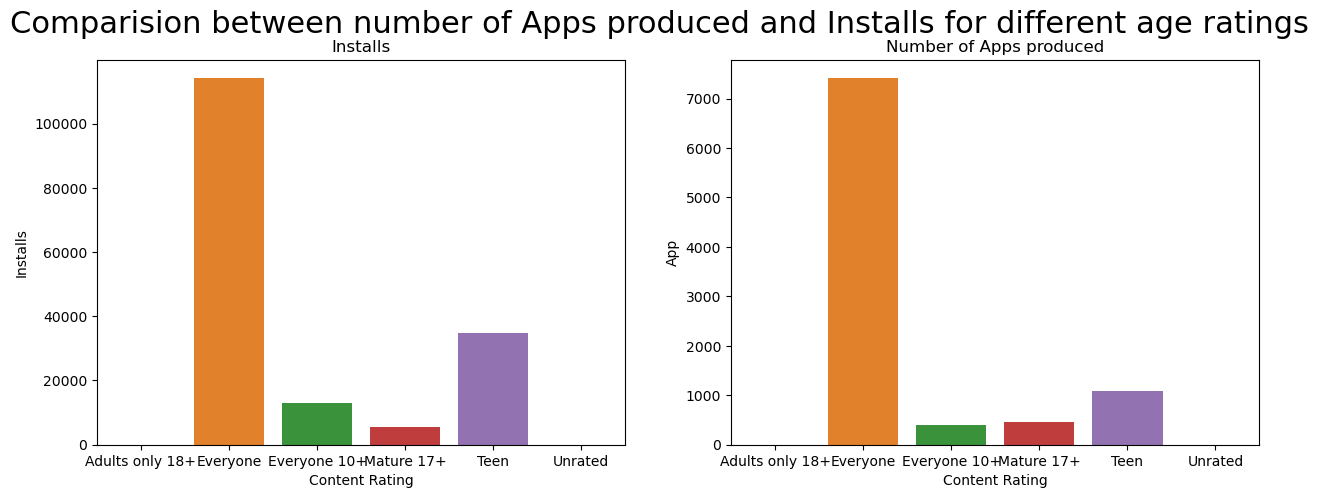

In [19]:
Data1 = Data.copy()

a = Data1.groupby(by='Content Rating').count()[["App"]]
a.insert(1, 'Installs', Data1.groupby(by='Content Rating').Installs.sum())
a['Installs'] = np.divide(a['Installs'], 1000000)
a = a.reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Comparision between number of Apps produced and Installs for different age ratings', fontsize=22)

sns.barplot(ax=axes[0], x=a['Content Rating'], y=a['Installs'])
axes[0].set_title("Installs")

sns.barplot(ax=axes[1], x=a['Content Rating'], y=a['App'])
axes[1].set_title('Number of Apps produced')

## Send us the Result (Maktabkhoone)